In [5]:
#Question 1: What is a random variable in probability theory?
# Interactive Random Variable Demo
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom, norm
import ipywidgets as widgets
from ipywidgets import interact

def random_variable_demo(n=10, p=0.5, mean=0.0, std=1.0, samples=5000):
    rng = np.random.default_rng(seed=42)

    # ----- DISCRETE: Binomial -----
    X = binom(n=n, p=p)
    x_samples = X.rvs(size=samples, random_state=rng)

    # Theoretical PMF
    k_vals = np.arange(0, n+1)
    pmf_vals = X.pmf(k_vals)

    # ----- CONTINUOUS: Normal -----
    Z = norm(loc=mean, scale=std)
    z_samples = Z.rvs(size=samples, random_state=rng)

    # ----- PLOTS -----
    plt.figure(figsize=(12, 5))

    # Left: Binomial
    plt.subplot(1, 2, 1)
    plt.bar(k_vals, pmf_vals, color="skyblue", edgecolor="black", alpha=0.7, label="Theoretical PMF")
    vals, counts = np.unique(x_samples, return_counts=True)
    plt.scatter(vals, counts/counts.sum(), color="red", zorder=5, label="Empirical PMF")
    plt.title(f"Binomial(n={n}, p={p})")
    plt.xlabel("k")
    plt.ylabel("P(X=k)")
    plt.legend()
    plt.grid(axis="y", linestyle="--", alpha=0.7)

    # Right: Normal
    plt.subplot(1, 2, 2)
    count, bins, _ = plt.hist(z_samples, bins=40, density=True, alpha=0.6, color="lightgreen", edgecolor="black", label="Empirical PDF")
    plt.plot(bins, Z.pdf(bins), 'r-', lw=2, label="Theoretical PDF")
    plt.title(f"Normal(mean={mean}, std={std})")
    plt.xlabel("z")
    plt.ylabel("Density")
    plt.legend()
    plt.grid(axis="y", linestyle="--", alpha=0.7)

    plt.tight_layout()
    plt.show()

# Create interactive sliders
interact(
    random_variable_demo,
    n=widgets.IntSlider(value=10, min=1, max=50, step=1, description="n (trials)"),
    p=widgets.FloatSlider(value=0.5, min=0.01, max=0.99, step=0.01, description="p (prob)"),
    mean=widgets.FloatSlider(value=0.0, min=-5, max=5, step=0.1, description="Normal mean"),
    std=widgets.FloatSlider(value=1.0, min=0.1, max=5, step=0.1, description="Normal std"),
    samples=widgets.IntSlider(value=5000, min=500, max=20000, step=500, description="Samples")
)


interactive(children=(IntSlider(value=10, description='n (trials)', max=50, min=1), FloatSlider(value=0.5, des…

<function __main__.random_variable_demo(n=10, p=0.5, mean=0.0, std=1.0, samples=5000)>

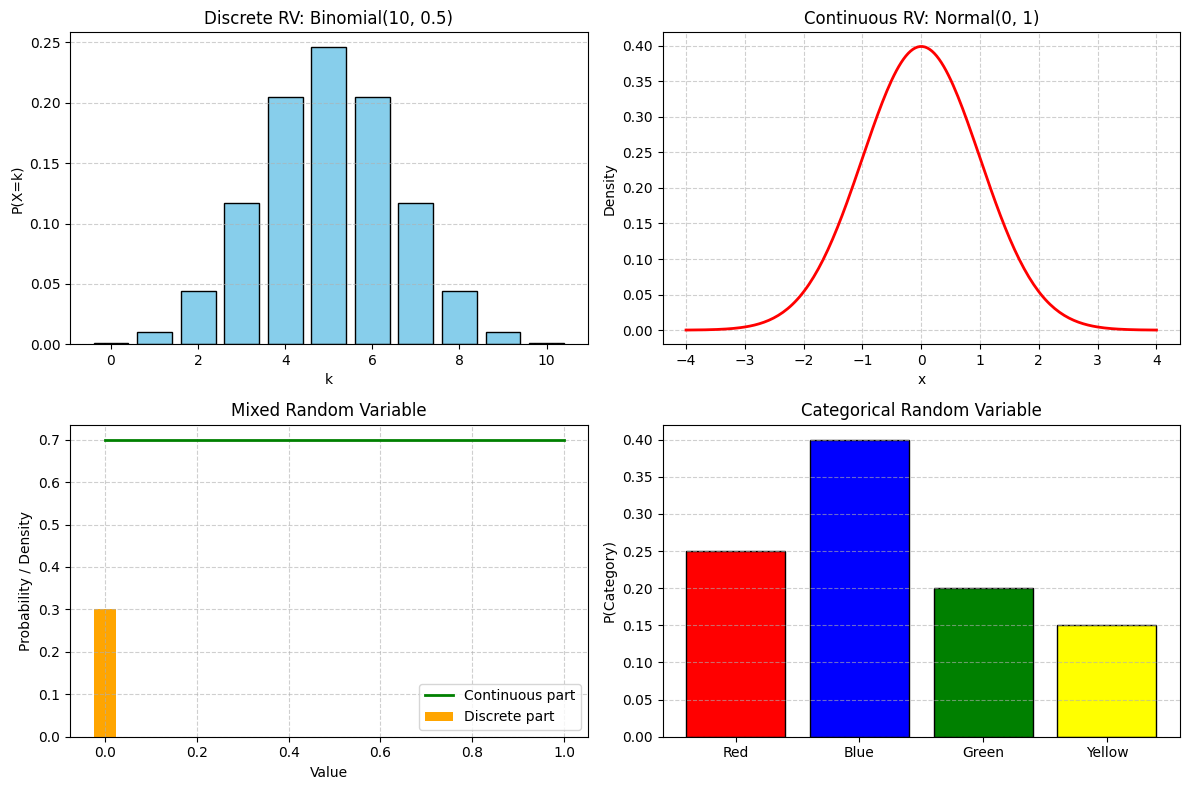

In [7]:
#Question 2: What are the types of random variables?
# RANDOM VARIABLE TYPES DEMO (Jupyter compatible)
# ---------------------------------------------------
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom, norm

# ----- 1. Discrete Random Variable -----
n, p = 10, 0.5
X = binom(n, p)
k = np.arange(0, n+1)
pmf_X = X.pmf(k)

plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.bar(k, pmf_X, color="skyblue", edgecolor="black")
plt.title("Discrete RV: Binomial(10, 0.5)")
plt.xlabel("k")
plt.ylabel("P(X=k)")
plt.grid(axis="y", linestyle="--", alpha=0.6)

# ----- 2. Continuous Random Variable -----
Z = norm(loc=0, scale=1)
x_vals = np.linspace(-4, 4, 200)
pdf_Z = Z.pdf(x_vals)

plt.subplot(2, 2, 2)
plt.plot(x_vals, pdf_Z, 'r-', lw=2)
plt.title("Continuous RV: Normal(0, 1)")
plt.xlabel("x")
plt.ylabel("Density")
plt.grid(True, linestyle="--", alpha=0.6)

# ----- 3. Mixed Random Variable -----
# 30% probability of 0, 70% probability uniform between 0 and 1
p_zero = 0.3
uniform_x = np.linspace(0, 1, 200)
uniform_pdf = np.ones_like(uniform_x) * (0.7)  # scaled so total probability = 0.7

plt.subplot(2, 2, 3)
plt.bar([0], [p_zero], width=0.05, color="orange", label="Discrete part")
plt.plot(uniform_x, uniform_pdf, 'g-', lw=2, label="Continuous part")
plt.title("Mixed Random Variable")
plt.xlabel("Value")
plt.ylabel("Probability / Density")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)

# ----- 4. Categorical Random Variable -----
categories = ["Red", "Blue", "Green", "Yellow"]
probs = [0.25, 0.40, 0.20, 0.15]

plt.subplot(2, 2, 4)
plt.bar(categories, probs, color=["red", "blue", "green", "yellow"], edgecolor="black")
plt.title("Categorical Random Variable")
plt.ylabel("P(Category)")
plt.grid(axis="y", linestyle="--", alpha=0.6)

plt.tight_layout()
plt.show()



DISCRETE vs CONTINUOUS DISTRIBUTIONS

1. DISCRETE DISTRIBUTIONS
- Variable takes on a countable set of values.
- Examples: number of heads in coin tosses, number of students in a class.
- Represented by a Probability Mass Function (PMF).
- Probability of each exact value is > 0.

2. CONTINUOUS DISTRIBUTIONS
- Variable takes on an uncountable set of values (real numbers in a range).
- Examples: height, weight, temperature.
- Represented by a Probability Density Function (PDF).
- Probability of any exact value is 0 — probabilities are for intervals.



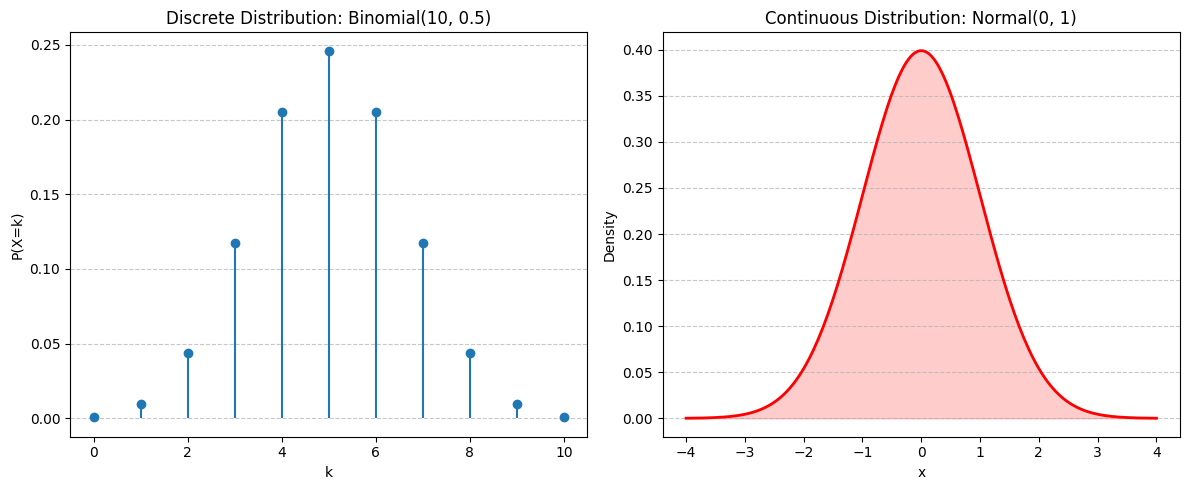

In [10]:
#Question 3: Explain the difference between discrete and continuous distributions.# DISCRETE vs CONTINUOUS DISTRIBUTIONS DEMO
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom, norm

# 1) THEORY EXPLANATION
print("""
===============================
DISCRETE vs CONTINUOUS DISTRIBUTIONS
===============================

1. DISCRETE DISTRIBUTIONS
- Variable takes on a countable set of values.
- Examples: number of heads in coin tosses, number of students in a class.
- Represented by a Probability Mass Function (PMF).
- Probability of each exact value is > 0.

2. CONTINUOUS DISTRIBUTIONS
- Variable takes on an uncountable set of values (real numbers in a range).
- Examples: height, weight, temperature.
- Represented by a Probability Density Function (PDF).
- Probability of any exact value is 0 — probabilities are for intervals.
""")

# 2) EXAMPLES
# Discrete: Binomial(n=10, p=0.5)
n, p = 10, 0.5
X = binom(n=n, p=p)
k_vals = np.arange(0, n+1)
pmf_vals = X.pmf(k_vals)

# Continuous: Normal(mean=0, std=1)
Z = norm(loc=0, scale=1)
z_vals = np.linspace(-4, 4, 200)
pdf_vals = Z.pdf(z_vals)

# 3) PLOTS
plt.figure(figsize=(12,5))

# Discrete Plot
plt.subplot(1,2,1)
plt.stem(k_vals, pmf_vals, basefmt=" ")
plt.title("Discrete Distribution: Binomial(10, 0.5)")
plt.xlabel("k")
plt.ylabel("P(X=k)")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Continuous Plot
plt.subplot(1,2,2)
plt.plot(z_vals, pdf_vals, 'r-', lw=2)
plt.fill_between(z_vals, pdf_vals, alpha=0.2, color='red')
plt.title("Continuous Distribution: Normal(0, 1)")
plt.xlabel("x")
plt.ylabel("Density")
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.tight_layout()
plt.show()


P(X = 7) = 0.1172


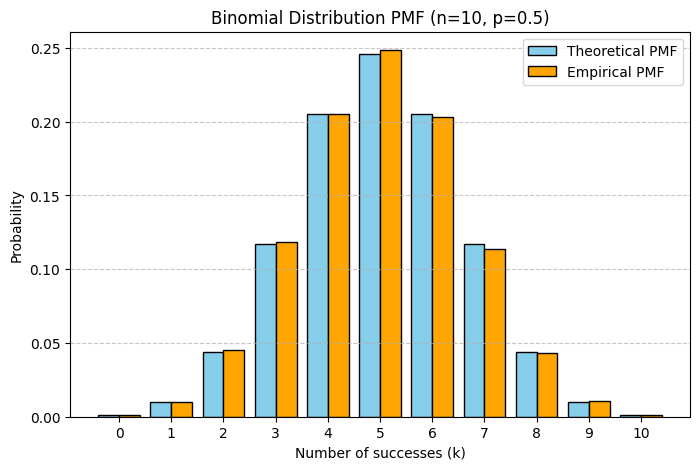

P(X <= 3) = 0.1719


In [11]:
#Question 4: What is a binomial distribution, and how is it used in probability?# %% [markdown]
# # Binomial Distribution — Explanation & Python Demo
# 
# ## 1. What is the Binomial Distribution?
# The **binomial distribution** models the number of *successes* in a fixed number of independent trials, 
# each with the same probability of success **p**.
# 
# Example: Toss a fair coin 10 times — what's the probability of getting exactly 7 heads?
# 
# A binomial random variable **X** is defined as:
# 
# \[
# X \sim \text{Binomial}(n, p)
# \]
# 
# where:
# - **n** = number of trials
# - **p** = probability of success in each trial
# 
# The probability of exactly **k** successes is:
# 
# \[
# P(X = k) = \binom{n}{k} p^k (1-p)^{n-k}
# \]
# 
# ---
# 
# ## 2. When is it used?
# - Coin tosses (heads vs tails)
# - Defective items in a batch
# - Yes/No survey responses
# 
# ---
# 
# **Key assumptions:**
# 1. Fixed number of trials (**n** is constant)
# 2. Only two possible outcomes per trial (success/failure)
# 3. Probability of success (**p**) is the same for each trial
# 4. Trials are independent
# 

# %% 
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

# Parameters
n = 10   # number of trials
p = 0.5  # probability of success

# Create binomial distribution object
X = binom(n=n, p=p)

# Possible outcomes
k_vals = np.arange(0, n+1)

# Probability Mass Function (PMF)
pmf_vals = X.pmf(k_vals)

# %% [markdown]
# ## 3. Example: Probability of getting exactly 7 heads in 10 tosses
# 

# %%
k = 7
prob_k = X.pmf(k)
print(f"P(X = {k}) = {prob_k:.4f}")

# %% [markdown]
# ## 4. Visualization of PMF
# We'll compare the theoretical PMF with simulated data.

# %%
# Simulate 10000 experiments
rng = np.random.default_rng(seed=42)
samples = X.rvs(size=10000, random_state=rng)

# Empirical PMF
vals, counts = np.unique(samples, return_counts=True)
empirical_pmf = counts / counts.sum()

# Plot
plt.figure(figsize=(8,5))
plt.bar(k_vals - 0.2, pmf_vals, width=0.4, color="skyblue", edgecolor="black", label="Theoretical PMF")
plt.bar(vals + 0.2, empirical_pmf, width=0.4, color="orange", edgecolor="black", label="Empirical PMF")
plt.xticks(k_vals)
plt.xlabel("Number of successes (k)")
plt.ylabel("Probability")
plt.title(f"Binomial Distribution PMF (n={n}, p={p})")
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# %% [markdown]
# ## 5. Cumulative Probability Example
# What is the probability of getting at most 3 successes?
# 

# %%
prob_at_most_3 = X.cdf(3)
print(f"P(X <= 3) = {prob_at_most_3:.4f}")

# %% [markdown]
# ## Summary
# - The binomial distribution models the number of successes in n independent trials.
# - It's widely used for yes/no type experiments.
# - In Python, `scipy.stats.binom` lets you calculate probabilities and simulate outcomes easily.


In [18]:
#Question 5: What is the standard normal distribution, and why is it important?
# STANDARD NORMAL DISTRIBUTION DEMO
# -----------------------------------
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import ipywidgets as widgets
from ipywidgets import interact

# 1) EXPLANATION (printed in notebook)
explanation = """
## What is the Standard Normal Distribution?

- A **normal distribution** is a bell-shaped, symmetric probability distribution defined by its mean (μ) and standard deviation (σ).
- The **standard normal distribution** is a special case with:
    μ = 0 (mean)
    σ = 1 (standard deviation)

**Why is it important?**
1. It's the basis for many statistical methods (z-scores, hypothesis testing, confidence intervals).
2. Any normal distribution can be converted ("standardized") to the standard normal using:
       Z = (X - μ) / σ
3. Widely used in probability tables and machine learning algorithms.

Let's explore it below.
"""
print(explanation)

# 2) Interactive visualization function
def plot_standard_normal(z_value=0.0):
    x = np.linspace(-4, 4, 500)
    y = norm.pdf(x, loc=0, scale=1)

    plt.figure(figsize=(8, 5))
    plt.plot(x, y, 'b-', lw=2, label='Standard Normal PDF')
    plt.fill_between(x, 0, y, where=(x <= z_value), color='skyblue', alpha=0.4,
                     label=f'P(Z <= {z_value:.2f}) = {norm.cdf(z_value):.4f}')
    plt.axvline(z_value, color='red', linestyle='--', lw=2)
    plt.title("Standard Normal Distribution")
    plt.xlabel("Z")
    plt.ylabel("Probability Density")
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

# 3) Interactive widget
interact(
    plot_standard_normal,
    z_value=widgets.FloatSlider(value=0.0, min=-3.5, max=3.5, step=0.1, description="Z-value")
)



## What is the Standard Normal Distribution?

- A **normal distribution** is a bell-shaped, symmetric probability distribution defined by its mean (μ) and standard deviation (σ).
- The **standard normal distribution** is a special case with:
    μ = 0 (mean)
    σ = 1 (standard deviation)

**Why is it important?**
1. It's the basis for many statistical methods (z-scores, hypothesis testing, confidence intervals).
2. Any normal distribution can be converted ("standardized") to the standard normal using:
       Z = (X - μ) / σ
3. Widely used in probability tables and machine learning algorithms.

Let's explore it below.



interactive(children=(FloatSlider(value=0.0, description='Z-value', max=3.5, min=-3.5), Output()), _dom_classe…

<function __main__.plot_standard_normal(z_value=0.0)>

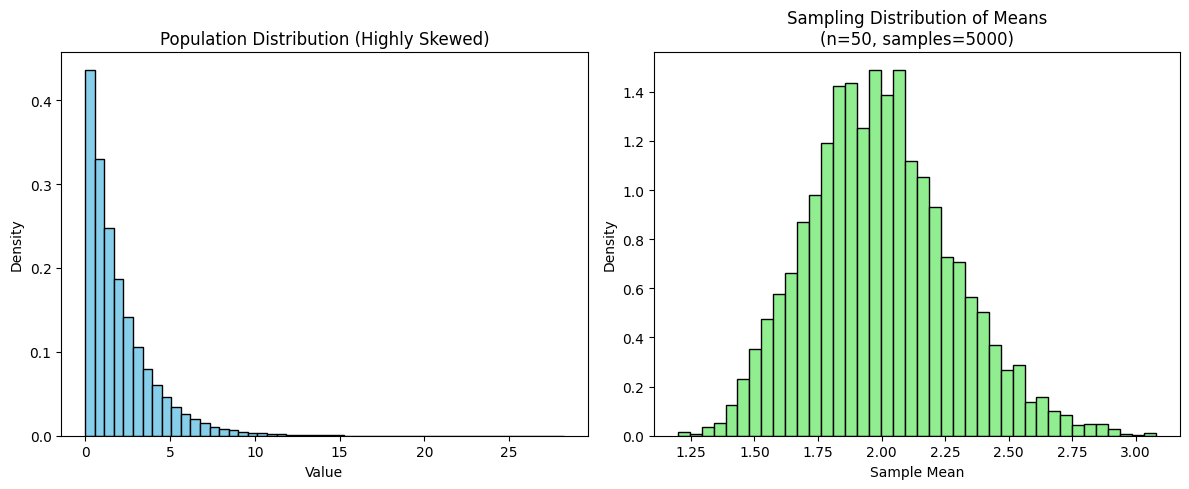

Population mean: 1.9995927045886297
Population std dev: 1.9995927954792923
Mean of sample means: 1.9955923999506486
Std dev of sample means: 0.28344741846746757


In [13]:
#Question 6: What is the Central Limit Theorem (CLT), and why is it critical in statistics?
# Central Limit Theorem Demo in Jupyter
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
rng = np.random.default_rng(42)

# Parameters
population_size = 1_000_000
sample_size = 50       # n per sample
num_samples = 5000     # number of sample means

# Step 1: Create a non-normal population (exponential distribution)
population = rng.exponential(scale=2.0, size=population_size)

# Step 2: Draw many samples and store their means
sample_means = []
for _ in range(num_samples):
    sample = rng.choice(population, size=sample_size, replace=False)
    sample_means.append(np.mean(sample))

sample_means = np.array(sample_means)

# Step 3: Visualization
plt.figure(figsize=(12,5))

# Left: Population distribution
plt.subplot(1,2,1)
plt.hist(population, bins=50, color="skyblue", edgecolor="black", density=True)
plt.title("Population Distribution (Highly Skewed)")
plt.xlabel("Value")
plt.ylabel("Density")

# Right: Sampling distribution of means
plt.subplot(1,2,2)
plt.hist(sample_means, bins=40, color="lightgreen", edgecolor="black", density=True)
plt.title(f"Sampling Distribution of Means\n(n={sample_size}, samples={num_samples})")
plt.xlabel("Sample Mean")
plt.ylabel("Density")

plt.tight_layout()
plt.show()

# Step 4: Print summary stats
print("Population mean:", np.mean(population))
print("Population std dev:", np.std(population))
print("Mean of sample means:", np.mean(sample_means))
print("Std dev of sample means:", np.std(sample_means))


Sample Mean = 170.60 cm
95% Confidence Interval = [167.63, 173.57] cm


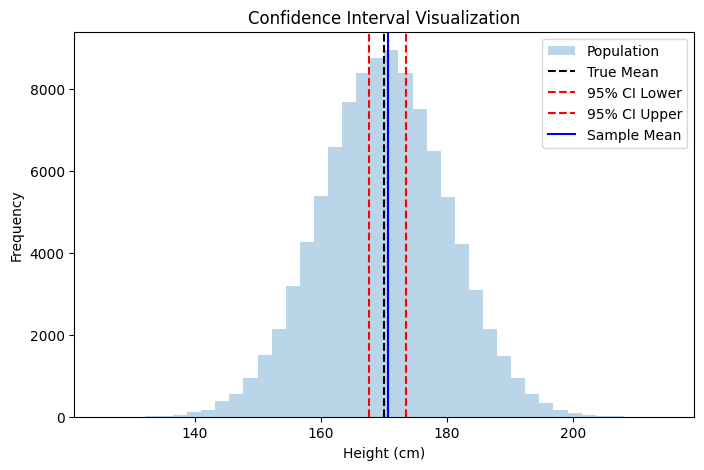

In [14]:
#Question 7: What is the significance of confidence intervals in statistical analysis?
# Confidence Interval Demo
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Parameters for population
np.random.seed(42)
population_mean = 170    # true mean (cm)
population_std = 10      # true std dev (cm)
population_size = 100000 # large population

# Create population data
population = np.random.normal(population_mean, population_std, population_size)

# Sampling
sample_size = 50
sample = np.random.choice(population, size=sample_size, replace=False)

# Sample mean & standard error
sample_mean = np.mean(sample)
sample_std = np.std(sample, ddof=1) # sample standard deviation
standard_error = sample_std / np.sqrt(sample_size)

# Confidence Interval (95%)
confidence_level = 0.95
ci_low, ci_high = stats.t.interval(
    confidence_level,
    df=sample_size - 1,
    loc=sample_mean,
    scale=standard_error
)

print(f"Sample Mean = {sample_mean:.2f} cm")
print(f"95% Confidence Interval = [{ci_low:.2f}, {ci_high:.2f}] cm")

# Plot population and sample
plt.figure(figsize=(8,5))
plt.hist(population, bins=40, alpha=0.3, label="Population")
plt.axvline(population_mean, color='black', linestyle='--', label="True Mean")
plt.axvline(ci_low, color='red', linestyle='--', label="95% CI Lower")
plt.axvline(ci_high, color='red', linestyle='--', label="95% CI Upper")
plt.axvline(sample_mean, color='blue', linestyle='-', label="Sample Mean")
plt.title("Confidence Interval Visualization")
plt.xlabel("Height (cm)")
plt.ylabel("Frequency")
plt.legend()
plt.show()



In [15]:
#Question 8: What is the concept of expected value in a probability distribution?
# Expected Value Demonstration (Discrete & Continuous)
# Works in Jupyter Notebook

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom, norm
import ipywidgets as widgets
from ipywidgets import interact

def expected_value_demo(n=6, p=0.5, mean=0.0, std=1.0, samples=5000):
    rng = np.random.default_rng(seed=42)

    # ----- DISCRETE: Binomial -----
    X = binom(n=n, p=p)
    k_vals = np.arange(0, n+1)
    pmf_vals = X.pmf(k_vals)
    E_X = np.sum(k_vals * pmf_vals)  # expected value formula

    # Simulation for discrete
    x_samples = X.rvs(size=samples, random_state=rng)
    E_X_emp = np.mean(x_samples)

    # ----- CONTINUOUS: Normal -----
    Z = norm(loc=mean, scale=std)
    # For continuous, scipy.stats.mean() uses the formula internally
    E_Z = Z.mean()

    # Simulation for continuous
    z_samples = Z.rvs(size=samples, random_state=rng)
    E_Z_emp = np.mean(z_samples)

    # ----- PLOTS -----
    plt.figure(figsize=(12, 5))

    # Left: Discrete Binomial PMF
    plt.subplot(1, 2, 1)
    plt.bar(k_vals, pmf_vals, color="skyblue", edgecolor="black", alpha=0.7)
    plt.axvline(E_X, color="red", linestyle="--", label=f"E[X] = {E_X:.2f}")
    plt.axvline(E_X_emp, color="green", linestyle=":", label=f"Empirical = {E_X_emp:.2f}")
    plt.title(f"Binomial(n={n}, p={p}) Expected Value")
    plt.xlabel("k")
    plt.ylabel("P(X=k)")
    plt.legend()
    plt.grid(axis="y", linestyle="--", alpha=0.7)

    # Right: Continuous Normal PDF
    x_grid = np.linspace(mean - 4*std, mean + 4*std, 400)
    plt.subplot(1, 2, 2)
    plt.plot(x_grid, Z.pdf(x_grid), 'b-', lw=2, label="PDF")
    plt.axvline(E_Z, color="red", linestyle="--", label=f"E[Z] = {E_Z:.2f}")
    plt.axvline(E_Z_emp, color="green", linestyle=":", label=f"Empirical = {E_Z_emp:.2f}")
    plt.title(f"Normal(mean={mean}, std={std}) Expected Value")
    plt.xlabel("z")
    plt.ylabel("Density")
    plt.legend()
    plt.grid(axis="y", linestyle="--", alpha=0.7)

    plt.tight_layout()
    plt.show()

    # Print values
    print("---- Expected Values ----")
    print(f"Discrete (Binomial): Theoretical = {E_X:.4f}, Empirical = {E_X_emp:.4f}")
    print(f"Continuous (Normal): Theoretical = {E_Z:.4f}, Empirical = {E_Z_emp:.4f}")

# Interactive sliders
interact(
    expected_value_demo,
    n=widgets.IntSlider(value=6, min=1, max=20, step=1, description="n (trials)"),
    p=widgets.FloatSlider(value=0.5, min=0.01, max=0.99, step=0.01, description="p (prob)"),
    mean=widgets.FloatSlider(value=0.0, min=-5, max=5, step=0.1, description="Normal mean"),
    std=widgets.FloatSlider(value=1.0, min=0.1, max=5, step=0.1, description="Normal std"),
    samples=widgets.IntSlider(value=5000, min=500, max=20000, step=500, description="Samples")
)


interactive(children=(IntSlider(value=6, description='n (trials)', max=20, min=1), FloatSlider(value=0.5, desc…

<function __main__.expected_value_demo(n=6, p=0.5, mean=0.0, std=1.0, samples=5000)>

Calculated Mean: 49.9947
Calculated Standard Deviation: 4.8956


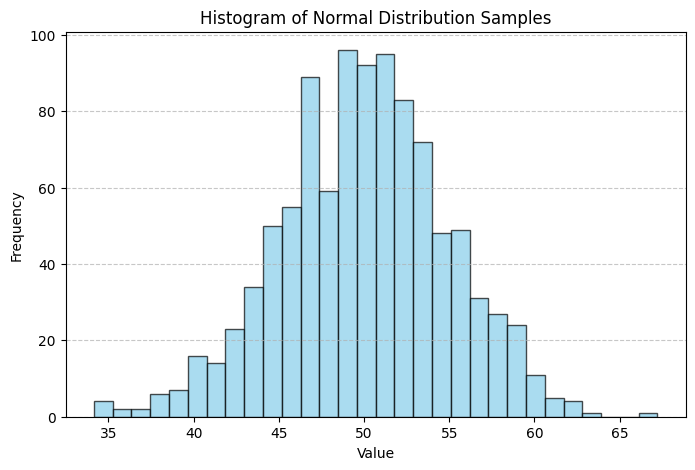

In [16]:
#Question 9: Write a Python program to generate 1000 random numbers from a normal distribution with mean = 50 and standard deviation = 5. Compute its mean and standard deviation using NumPy, and draw a histogram to visualize the distribution.
#(Include your Python code and output in the code box below.)
# Generate & analyze normal distribution samples
import numpy as np
import matplotlib.pyplot as plt

# Parameters
mean = 50
std_dev = 5
size = 1000

# Generate random numbers from Normal(mean, std_dev)
data = np.random.normal(loc=mean, scale=std_dev, size=size)

# Compute mean and standard deviation using NumPy
calculated_mean = np.mean(data)
calculated_std = np.std(data)

# Display results
print(f"Calculated Mean: {calculated_mean:.4f}")
print(f"Calculated Standard Deviation: {calculated_std:.4f}")

# Plot histogram
plt.figure(figsize=(8, 5))
plt.hist(data, bins=30, color="skyblue", edgecolor="black", alpha=0.7)
plt.title("Histogram of Normal Distribution Samples")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


In [17]:
#Question 10: You are working as a data analyst for a retail company. The company has
#collected daily sales data for 2 years and wants you to identify the overall sales trend.
#daily_sales = [220, 245, 210, 265, 230, 250, 260, 275, 240, 255,
#235, 260, 245, 250, 225, 270, 265, 255, 250, 260]
#● Explain how you would apply the Central Limit Theorem to estimate the average sales
#with a 95% confidence interval.
#● Write the Python code to compute the mean sales and its confidence interval.
#(Include your Python code and output in the code box below.)
import numpy as np
import scipy.stats as st

# Daily sales data (example)
daily_sales = [220, 245, 210, 265, 230, 250, 260, 275, 240, 255,
               235, 260, 245, 250, 225, 270, 265, 255, 250, 260]

# Convert to numpy array for easier math
data = np.array(daily_sales)

# Step 1: Mean sales
mean_sales = np.mean(data)

# Step 2: Standard deviation
std_sales = np.std(data, ddof=1)  # sample standard deviation

# Step 3: Standard error
n = len(data)
se = std_sales / np.sqrt(n)

# Step 4: 95% confidence interval using CLT
confidence_level = 0.95
z_score = st.norm.ppf((1 + confidence_level) / 2)  # 1.96 for 95%
margin_of_error = z_score * se

ci_lower = mean_sales - margin_of_error
ci_upper = mean_sales + margin_of_error

print(f"Mean Sales: {mean_sales:.2f}")
print(f"95% Confidence Interval: ({ci_lower:.2f}, {ci_upper:.2f})")


Mean Sales: 248.25
95% Confidence Interval: (240.68, 255.82)
